In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/imagetraindata/m_504edbda459b24ff.sidx
/kaggle/input/imagetraindata/objects.bin
/kaggle/input/imagetraindata/m_504edbda459b24ff.frame_idx
/kaggle/input/imagetraindata/dir_archive.ini
/kaggle/input/imagetraindata/m_504edbda459b24ff.0000
/kaggle/input/imagetestdata/m_e16f5ffd2c088370.frame_idx
/kaggle/input/imagetestdata/m_e16f5ffd2c088370.0000
/kaggle/input/imagetestdata/m_e16f5ffd2c088370.sidx
/kaggle/input/imagetestdata/objects.bin
/kaggle/input/imagetestdata/dir_archive.ini


In [5]:
!pip install turicreate
import turicreate as tc

     |████████████████████████████████| 91.9 MB 1.9 kB/s  eta 0:00:01
     |████████████████████████████████| 322 kB 40.3 MB/s eta 0:00:01
     |████████████████████████████████| 3.5 MB 26.6 MB/s eta 0:00:01
     |████████████████████████████████| 86.3 MB 69 kB/s s eta 0:00:01
     |████████████████████████████████| 449 kB 41.5 MB/s eta 0:00:01
     |████████████████████████████████| 50 kB 4.1 MB/s  eta 0:00:01
     |████████████████████████████████| 3.8 MB 39.0 MB/s eta 0:00:01
  Created wheel for resampy: filename=resampy-0.2.1-py3-none-any.whl size=320848 sha256=1427d0b3583d822294b6e421286d765e58c0cca02638f8cb7c8be0cb32c5adbb
  Stored in directory: /root/.cache/pip/wheels/71/74/53/d5ceb7c5ee7a168c7d106041863e71ac3273f4a4677743a284
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7539 sha256=b9756eb26fe803e91cc040ac59a1d1b5e6c7f8765f1091b0d7ad2c8737645a1f
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Succ

    Uninstalling tensorflow-estimator-2.3.0:
      Successfully uninstalled tensorflow-estimator-2.3.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.3.0
    Uninstalling tensorboard-2.3.0:
      Successfully uninstalled tensorboard-2.3.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.3.0
    Uninstalling tensorflow-2.3.0:
      Successfully uninstalled tensorflow-2.3.0
ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

tensorflow-probability 0.11.0 requires gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
librosa 0.8.0 requires resampy>=0.2.2, but you'll have resampy 0.2.1 which is incompatible.
You should consider upgrading via the '/opt/conda/bin/python3.7 -m p

In [6]:
image_train = tc.SFrame('../input/imagetraindata')

In [7]:
#deep_learning_model = graphlab.load_model('http://s3.amazonaws.com/GraphLab-Datasets/deeplearning/imagenet_model_iter45')
#image_train['deep_features'] = deep_learning_model.extract_features(image_train)

In [8]:
image_train.head()

id,image,label,deep_features,image_array
24,Height: 32 Width: 32,bird,"[0.24287176132202148,1.0954537391662598, 0.0, ...","[73.0, 77.0, 58.0, 71.0,68.0, 50.0, 77.0, 69.0, ..."
33,Height: 32 Width: 32,cat,"[0.5250879526138306, 0.0,0.0, 0.0, 0.0, 0.0, ...","[7.0, 5.0, 8.0, 7.0, 5.0,8.0, 5.0, 4.0, 6.0, 7.0, ..."
36,Height: 32 Width: 32,cat,"[0.5660159587860107, 0.0,0.0, 0.0, 0.0, 0.0, ...","[169.0, 122.0, 65.0,131.0, 108.0, 75.0, ..."
70,Height: 32 Width: 32,dog,"[1.129795789718628, 0.0,0.0, 0.7781944870948792, ...","[154.0, 179.0, 152.0,159.0, 183.0, 157.0, ..."
90,Height: 32 Width: 32,bird,"[1.7178692817687988, 0.0,0.0, 0.0, 0.0, 0.0, ...","[216.0, 195.0, 180.0,201.0, 178.0, 160.0, ..."
97,Height: 32 Width: 32,automobile,"[1.5781855583190918, 0.0,0.0, 0.0, 0.0, 0.0, ...","[33.0, 44.0, 27.0, 29.0,44.0, 31.0, 32.0, 45.0, ..."
107,Height: 32 Width: 32,dog,"[0.0, 0.0,0.22067785263061523, ...","[97.0, 51.0, 31.0, 104.0,58.0, 38.0, 107.0, 61.0, ..."
121,Height: 32 Width: 32,bird,"[0.0,0.23753464221954346, ...","[93.0, 96.0, 88.0, 102.0,106.0, 97.0, 117.0, ..."
136,Height: 32 Width: 32,automobile,"[0.0, 0.0, 0.0, 0.0, 0.0,0.0, 7.57378625869751, ...","[35.0, 59.0, 53.0, 36.0,56.0, 56.0, 42.0, 62.0, ..."
138,Height: 32 Width: 32,bird,"[0.6589357256889343, 0.0,0.0, 0.0, 0.0, 0.0, ...","[205.0, 193.0, 195.0,200.0, 187.0, 193.0, ..."


In [9]:
knn_model = tc.nearest_neighbors.create(image_train,features=['deep_features'],
                                             label='id')

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

,SArray
0,

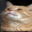

In [11]:
tc.visualization.set_target(target='auto')
cat = image_train[18:19]
cat['image'].explore()

In [12]:
knn_model.query(cat)

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.0498753   | 11.56ms      |

| Done         |         | 100         | 149.127ms    |

+--------------+---------+-------------+--------------+

query_label,reference_label,distance,rank
0,384,0.0,1
0,6910,36.94031379506751,2
0,39777,38.46348889747021,3
0,36870,39.75596231189652,4
0,41734,39.786601414815024,5


In [13]:
def get_images_from_ids(query_result):
    return image_train.filter_by(query_result['reference_label'],'id')

In [14]:
cat_neighbors = get_images_from_ids(knn_model.query(cat))


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.0498753   | 10.922ms     |

| Done         |         | 100         | 138.039ms    |

+--------------+---------+-------------+--------------+

,SArray
0,
1,
2,
3,
4,

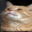
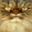
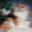
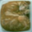
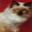

In [15]:
cat_neighbors['image'].explore()

,SArray
0,

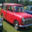

In [17]:
car = image_train[8:9]
car['image'].explore()

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.0498753   | 11.59ms      |

| Done         |         | 100         | 138.846ms    |

+--------------+---------+-------------+--------------+

,SArray
0,
1,
2,
3,
4,

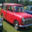
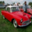
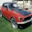
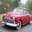
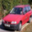

In [18]:
get_images_from_ids(knn_model.query(car))['image'].explore()


In [19]:
show_neighbors = lambda i: get_images_from_ids(knn_model.query(image_train[i:i+1]))['image'].explore()


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.0498753   | 12.919ms     |

| Done         |         | 100         | 141.89ms     |

+--------------+---------+-------------+--------------+

,SArray
0,
1,
2,
3,
4,

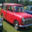
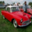
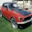
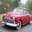
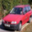

In [20]:
show_neighbors(8)


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.0498753   | 11.561ms     |

| Done         |         | 100         | 137.865ms    |

+--------------+---------+-------------+--------------+

,SArray
0,
1,
2,
3,
4,

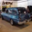
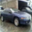
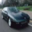
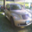
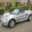

In [21]:
show_neighbors(26)
